In [ ]:
"""
-*- coding: utf-8 -*-
@author: Nicholas Hopewell
@created: August 29, 2019
--------------------------------------------------
This file is a simple test of my method for
reading in data with a struc I generate beforehand
(using prefiltering, proper dtypes, and cat pointers) 
versus the current method AASC uses to read data
into Python.

The results are summarized in a table below. 
As seen, my method provides massive gains in terms
of memory management and will be mandatory when
working in memoery with multiple large tables.
"""

In [2]:
from AALTable_ import AALTable
from table_strucs import sp_india_struc
import pandas as pd
import pyodbc as odbc

Changing schema reference.
Using schema: SPSS_SCH.


In [2]:
#  USING MY METHOD
main = AALTable(schema='SPSS_SCH', 
                 name='SP_INDIA_MAIN',
                 struc=sp_india_struc)

#  COMPARED TO PREXISTING METHOD USED
con = odbc.connect(dsn='Netezza AAL', autocommit=False)
to_compare = pd.read_sql("SELECT * FROM SPSS_SCH.SP_INDIA_MAIN;", con=con)

In [ ]:
#to_compare.info() #219.3 MB
#to_compare.dtypes

#main.data.info()  #88.7 MB
#main.data.dtypes

In [3]:
# >>>>>  X10 <<<<<<
x = pd.concat([to_compare, to_compare, to_compare, to_compare, 
               to_compare, to_compare, to_compare, to_compare, to_compare, to_compare])
#x.shape #(2932760, 98)
#x.info() #  2.2+ GB

z = pd.concat([main.data, main.data, main.data, main.data, main.data, main.data, 
               main.data, main.data, main.data, main.data])


#z.shape #(2932760, 89)
#z.info() # 861.2+ MB

In [4]:
del main
del to_compare

In [ ]:
# >>>>>  X30 <<<<<<
a = pd.concat([x, x, x])
#a.shape # (8798280, 98)
#a.info()  # 6.5+ GB

In [ ]:
del a

In [ ]:
b = pd.concat([z, z, z])
#b.shape #(8798280, 89)
#b.info()  # 2.5+ GB

In [ ]:
del b 


|      ~     | **old_way**      | **my_way**      |
|-----------|--------------|-------------|
|  **x1**                                  |
|  df shape:   |(293276, 98)  |(293276, 89) |
|  memory used:| 219.3 MB     | 88.7 MB     |
| **x10**                                  |
|  df shape:   |(2932760, 98) |(2932760, 89)|
|  memory used:|2.2+ GB       |861.2+ MB    |
| **x30**                                  |
|  df shape:   |(8798280, 98) |(8798280, 89)|
|  memory used:|6.5+ GB       |2.5+ GB      |

In [3]:
### VIZUALIZED:
#
import seaborn as sns

data = [['old_way', 'x1\n(293276 rows)', 219.3], ['my_way', 'x1\n(293276 rows)', 88.7],
        ['old_way', 'x10\n(2932760 rows)', 2200], ['my_way', 'x10\n(2932760 rows)', 861.2],
        ['old_way', 'x30\n(8798280 rows)', 6500], ['my_way', 'x30\n(8798280 rows)', 2500]]
results = pd.DataFrame(data, columns=['Method', 'nrows', 'size_in_MB'])

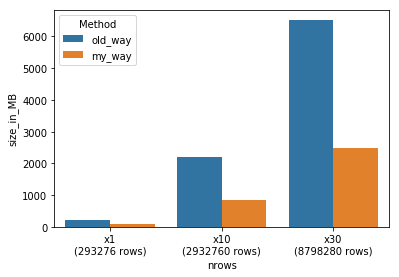

In [4]:
sns.barplot(x="nrows", y="size_in_MB", hue="Method", 
            data=results)

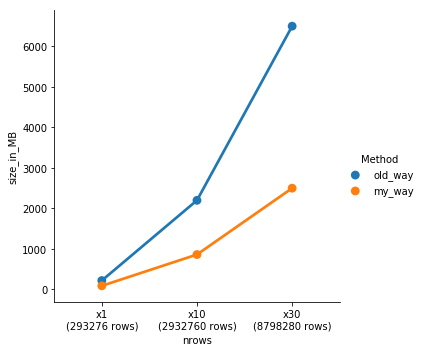

In [5]:
sns.catplot(x="nrows", y="size_in_MB", hue="Method", kind="point", 
            data=results)